In [2]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.spatial.distance as sdist
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
data = pd.read_csv("TP1_data.csv", index_col=0)
X = data.drop("classe", 1)
y = data.classe

## 1. Représentation des données :
(a) En visualisant puis en évaluant quantitativement les relations de corrélation entre les 4
variables de représentation, déterminez s’il est nécessaire d’appliquer une transformation
des variables basée sur l’analyse des composantes principales (ACP). Les relations de
corrélation entre les variables sont-elles similaires pour toutes les 3 classes ?


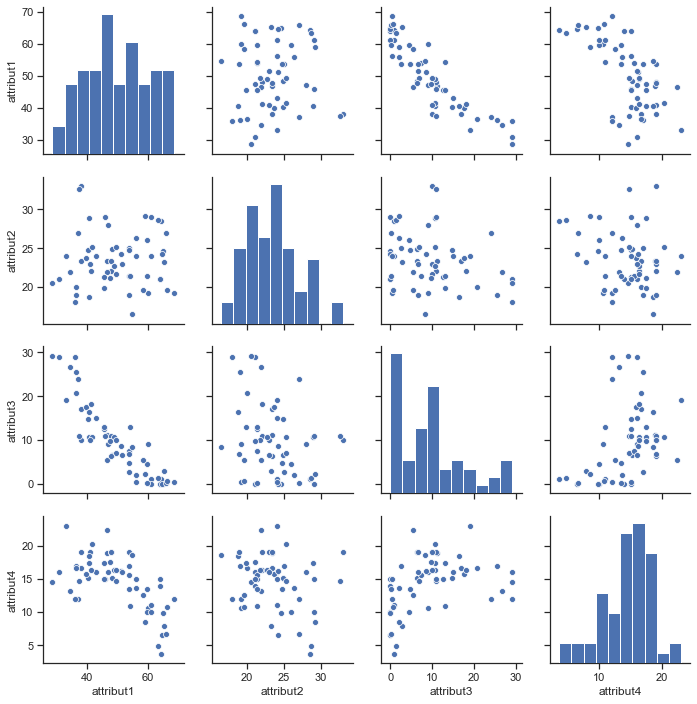

In [4]:
sns.pairplot(X)

Les attributs 1 et 3 semblent corrélés. 

On peut le confirmer avec deux mesures de corrélation: la méthode de Pearson et celle de Spearman.

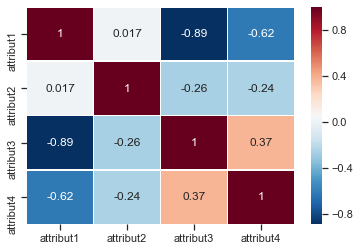

In [5]:
pearson_corr = X.corr(method='pearson')

sns.heatmap(pearson_corr, 
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

On peut confirmer avec ces graphes qu'il y a effectivement une corrélation légère entre les attributs 1 et 3.

On s'intéresse maintenant au lien, s'il existe, entre la classe et la corrélation des différents attributs:

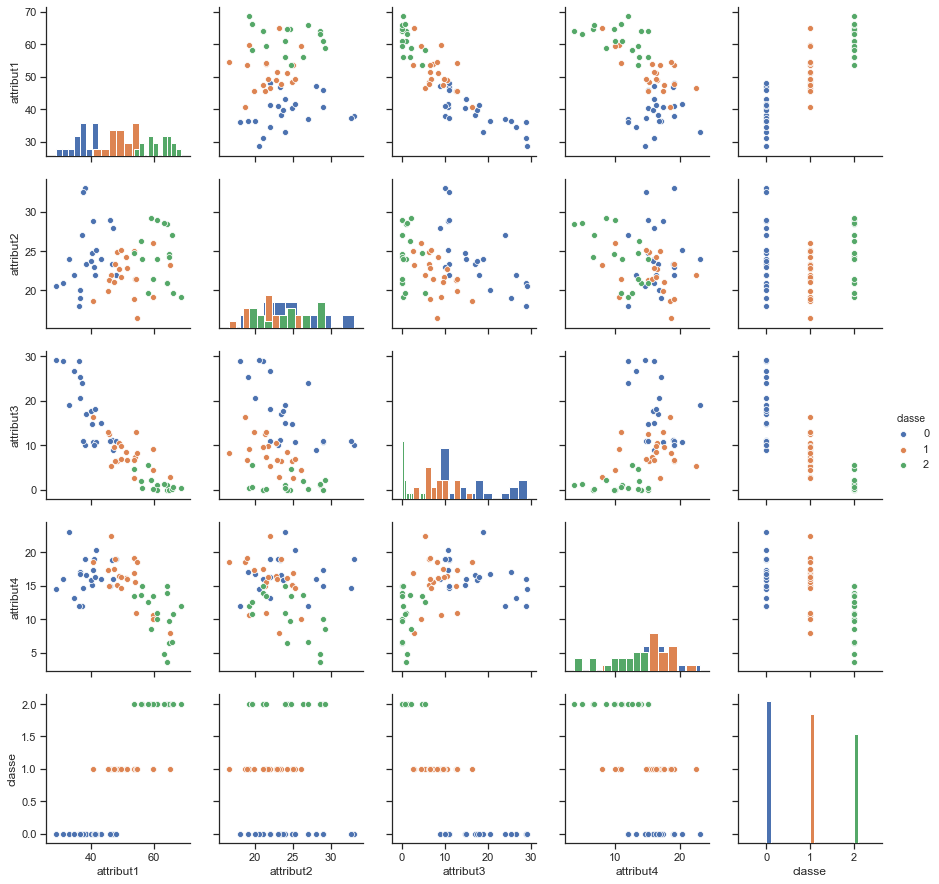

In [6]:
df = pd.concat([X, y], axis = 1)
g = sns.pairplot(df, hue='classe', diag_kind='hist')

In [7]:
# sns.boxplot(x='y', y='attribut1')

(b) En visualisant la séparation entre les 3 classes après transformation par ACP, déterminez
un nombre optimal de composantes principales (CP) à utiliser pour la classification :
2CP ou 3CP. Vérifiez votre réponse en calculant, pour chaque objet, le centroïde dont
il est le plus proche par la distance (Euclidienne) dans les cas 2CP et 3CP, puis en
comparant avec les classes réelles des objets.

Application des l'ACP 2CP et 3CP:

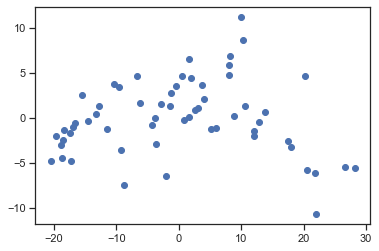

In [8]:
pca_2CP = PCA(n_components=2).fit(X).transform(X)
pca_3CP = PCA(n_components=3).fit(X).transform(X)
plt.scatter(pca_2CP[:,0], pca_2CP[:,1]) 
# plt.scatter(pca_3CP[:,0], pca_3CP[:,1]) # pareil

Traitement et calcul distance du centroïde pour 2CP:

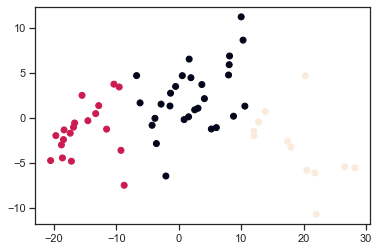

In [9]:
kmeans_2CP = KMeans(n_clusters=3, init='k-means++').fit(pca_2CP)
labels_2CP = kmeans_2CP.labels_
centroids_2CP = kmeans_2CP.cluster_centers_

plt.scatter(pca_2CP[:, 0], pca_2CP[:, 1], c=labels_2CP)

In [10]:
cpt_errors_2CP = 0
for i, point in enumerate(pca_2CP):
    dist_2CP = [sdist.euclidean(point, centroids_2CP[j]) for j in range(len(centroids_2CP))]
    min_dist_2CP, y_min_dist_2CP = min(dist_2CP), dist_2CP.index(min(dist_2CP))
    if y_min_dist_2CP != y[i]:
        cpt_errors_2CP += 1
print("Distance moyenne entre le centroïde le plus proche et les points :", np.mean(min_dist_2CP))
print("Nombre erreurs de classification:", cpt_errors_2CP)


Distance moyenne entre le centroïde le plus proche et les points : 6.30067900749472
Nombre erreurs de classification: 45


Traitement et calcul distance du centroïde pour 3CP:

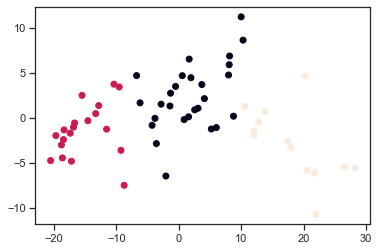

In [11]:
kmeans_3D = KMeans(n_clusters=3, init='k-means++').fit(pca_3CP)
labels_3CP = kmeans_3D.labels_
centroids_3CP = kmeans_3D.cluster_centers_
plt.scatter(pca_3CP[:, 0], pca_3CP[:, 1], c=kmeans_3D.labels_)

In [12]:
cpt_errors_3CP = 0
for i, point in enumerate(pca_3CP):
    dist_3CP = [sdist.euclidean(point, centroids_3CP[j]) for j in range(len(centroids_3CP))]
    min_dist_3CP, y_min_dist_3CP = min(dist_3CP), dist_3CP.index(min(dist_3CP))
    if y_min_dist_3CP != labels_3CP[i]:
        cpt_errors_3CP += 1
print("Distance moyenne entre le centroïde le plus proche et les points :", np.mean(min_dist_3CP))
print("Nombre erreurs de classification:", cpt_errors_3CP)

Distance moyenne entre le centroïde le plus proche et les points : 7.347504701422034
Nombre erreurs de classification: 0


En moyenne la distance entre les centroïdes et les poids est minimisée et ne produit aucune erreur par l'utilisation de 3 composantes principales.
C'est donc sur cette base que nous allons continuer à partir de maintenant.   

## 2. Mesure de distance :
(a) D’après les résultats sur l’analyse de corrélation entre les variables de représentation
(1.(a)), quelle mesure de distance (Manhattan, Euclidienne, ou Mahalanobis) entre les
objets serait la plus adéquate ? Vérifiez votre réponse en calculant pour chacune des
mesures de distance, le centroïde le plus proche de chaque objet, puis en comparant avec
les classes réelles des objets.

Nous avons pu effectuer les calculs dans le cas de l'utilisation d'une mesure de 
distance Euclidienne qui nous a donné les résultats suivants:

In [13]:
print("Distance moyenne entre le centroïde le plus proche et les points :", np.mean(min_dist_3CP))
print("Nombre erreurs de classification:", cpt_errors_3CP)

Distance moyenne entre le centroïde le plus proche et les points : 7.347504701422034
Nombre erreurs de classification: 0


On s'intéresse maintenant à la mesure de distance Manhattan et Mahalanobis:

In [42]:
cpt_errors_manhattan = 0
cpt_errors_mahalanobis = 0
covmx = np.cov(pca_3CP.T) # matrice de covariance pour Mahalanobis
invcovmx = sp.linalg.inv(covmx)
for i, point in enumerate(pca_3CP):
    dist_manhattan = [sdist.cityblock(point, centroids_3CP[j]) for j in range(len(centroids_3CP))]
    dist_mahalanobis = [sdist.mahalanobis(point, centroids_3CP[j], invcovmx) for j in range(len(centroids_3CP))]
    min_dist_manhattan, y_min_dist_manhattan = min(dist_manhattan), dist_manhattan.index(min(dist_manhattan))
    min_dist_mahalanobis, y_min_dist_mahalanobis = min(dist_mahalanobis), dist_mahalanobis.index(min(dist_mahalanobis))
    if y_min_dist_mahalanobis != labels_3CP[i]:
        cpt_errors_manhattan += 1
    if y_min_dist_mahalanobis != labels_3CP[i]:
        cpt_errors_mahalanobis += 1
print("Distance moyenne par la mesure de distance Manhattan :", np.mean(min_dist_manhattan))
print("Nombre erreurs par la mesure de distance Manhattan :", cpt_errors_manhattan, "\n")
print("Distance moyenne par la mesure de distance Mahalanobis :", np.mean(min_dist_mahalanobis))
print("Nombre erreurs par la mesure de distance Mahalanobis :", cpt_errors_mahalanobis)
      

Distance moyenne par la mesure de distance Manhattan : 11.873301748821989
Nombre erreurs par la mesure de distance Manhattan : 6 

Distance moyenne par la mesure de distance Mahalanobis : 1.2144515646068517
Nombre erreurs par la mesure de distance Mahalanobis : 6


On remarque que le distance moyenne entre le centre du centroïde et les points est extrèmement
réduit par l'utilisation de la mesure de distance Mahalanobis, or celle-ci produit cependant des
erreurs de classification. Ici, la mesure de type Manhattan n'a pas lieu d'être. 
La mesure de distance Euclidienne est donc le bon compromis pour notre jeu de données. 

(b) Pour la distance de Mahalanobis, on peut utiliser une matrice de covariance par classe
ou une matrice de covariance pour toutes les données. Laquelle des deux options est la
plus adéquate ?

Si les distributions des données est différentes entre les classes, il est sûrement plus 
intéressant de calculer une matrice de covariance pour chaque classe et ainsi calculer la distance
moyenne entre le centre du centroïde et les points. 
Nous allons voir si cela s'applique à notre jeu de données:

## 3. Choix du modèle de classification :
(a) En utilisant la meilleure représentation des données retenue au Point 1, et la meilleure
mesure de distance retenue au Point 2, tester la méthode des k = 5 plus proches voisins
ou la méthode du plus proche centroïde, et déterminez la plus adéquate.

(b) On fait l’hypothèse que les objets correspondent à des mélanges de distributions gaussiennes correspondant aux classes. Déterminez si cette hypothèse est vraissemblable en
appliquant une classification par modèle de mélange gaussien ("Gaussian Mixture Model”) aux données. Justifiez votre choix parmi les quatre options du modèle pour la
covariance des différentes classes (spherical, diag, tied, ou full).

## 4. Application :
À l’aide du modèle retenue au Point 3., déterminez la classe de la nouvelle
observation suivante : [52.1, 23.0, 6.1, 16.5]
